In [ ]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 로드

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/kaggle study/1. titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/kaggle study/1. titanic/test.csv')
combine = [train_df, test_df]

- feature 기록 (column 명)


- PassengerID : 각 승객의 고유 번호
- Survived : 생존 여부(종속 변수) **타겟값**
  - 0 = 사망, 1 = 생존
- Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
- Name : 이름
- Sex : 성별
- Age : 나이
- SibSp : 동반한 형제자매, 배우자 수
- Parch : 동반한 부모, 자식의 수
- Ticket : 티켓의 고유넘버
- Fare : 티켓 요금
- Cabin : 객실 번호
- Embarked : 승선한 항
  - C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

- 어떤 feature가 categorical이고
  - categorical : 명목, 순서, 비율, 간격 기반 값 등
- 어떤 feature가 numerical인지 **구분**
  - numerical : 값이 이산/연속 또는 시계열 기반

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


- 공백이나 null값이 포함된 feature는 무엇이 있는지.
  
  : Age 177개, Cabin 687개, Embarked 2개

- feature들의 데이터 유형은 무엇인지.
  
  : 7가지(test는 6)의 int/float, 5가지의 object

In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

- 수치 feature 분포는 어떻게 되는지

  : 실제 문제 영역의 훈련셋이 얼마나 대표적인지를 결정하는데 도움됨

  - 총 표본은 891명으로 배에 탑승한 승객 수(2,224명)의 40%
  - Survived는 값이 0 또는 1인 범주형 feature
  - 약 38%의 샘플이 32%의 실제 생존율을 대표하여 살아남음
  - Parch : 대부분의 승객(>75%)은 부모 또는 자녀와 함께 탑승하지 않았음
  - SibSp : 승객 중 30%는 형제자매or배우자가 함께 탑승함
  - 요금은 512달러까지 지불하는 소수의 승객(<1%)과 함께 다양하게 나타남
  - 65-80세 소수의 고령 승객(<1%)

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 범주형 feature의 분포는 어떻게 되는가
  - count=unique=891
  - 891명 중 577명의 남성
  - Cabin 은 샘플 간에 여러 중복 항목이 있음. 여러 승객이 Cabin을 공유함
  - Embarked 대부분의 승객이 S 에서 탑승



In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- 데이터 분석을 기반으로 한 가정

  - Correlating 상관
    - 각 feature가 Survived와 얼마나 관련되는지
  - Completing
    - Age는 Survived와 확실히 관련이 있으므로 완성할 수 있다.
    - Survived 또는 다른 feature들과도 관련이 있을 수 잇으므로 Embarked를 채우는 것이 좋다.
  - Correcting
    - Ticket은 중복비율이 높고 Survived 와의 상관관계가 없을 수 있으므로 분석에서 제외될 수 있음
    - Cabin은 너무 많은 null이 있음
    - PassergenID는 생존여부에 기여하지 않음
    - Name도 상대적으로 비표준이며 생존여부에 직접 기여하지 않으므로 삭제
  - Creating
    - Parch와 SibSp를 기반으로 Family라는 새로운 feature를 생성하여 탑승한 가족구성원의 수를 얻을 수 있음
    - 제목을 새 기능으로 추출하기 위해 이름 기능을 엔지니어링 할 수 잇음
    - Age 연령대에 대한 새 기능을 만들 수 있음. (연속적 수치 피처를 서수적 범주 피처로 바꿈)
    - 분석에 도움이 된다면, Fare 범위 피처를 만들 수도 있음
  - Classifying
    - 여성이 생존 가능성이 더 높았음
    - 어린이가 생존할 가능성이 더 큼
    - 상위 클래스 승객(Pclass=1)이 생존할 가능성이 높았음

 **※ 아래코드에서 !**

- 관찰, 가정 중 일부 확인하기 위해 feature들을 서로 pivot하여 featue들의 상관관계를 빠르게 분석할 수 있다. (null값이 없는 feature에 대해서)
  - 범주형(Sex), 서수형(Pclass), 이산형(SibSp,Parch) feature에 대해서만
  


In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## 데이터 시각화

- 수치형 feature의 상관관계

  - histogram chart 는 Age와 같은 연속적인 숫자 변수를 분석하는데 유용함.
    - x축은 샘플 또는 승객의 수
  
  - Observations
    - 영아(Age <= 4)가 높은 생존율을 보였다
    - 가장 나이가 많은 승객(Age=80)이 생존함
    - 15-25세의 많은 승객들이 살아남지 못했음
    - 대부분의 승객은 15-35세
  - Decisions
    - 모델훈련에서 나이를 고려해야 함(#2가정분류)
    - Age의 null값을 채운다.(#1 완성)
    - Age 그룹화(#3 생성)

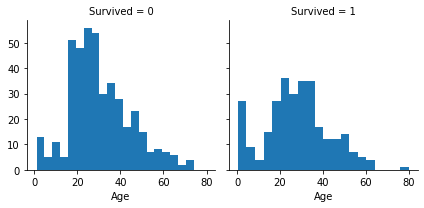

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- 수치형 feature와 순서적 feature의 상관관계
  -

  - Observations
    - Pclass=3에는 대부분의 승객이 있었지만 대부분 생존하지 못했다.
    - Pclass=2 및 Pclass=3의 유아승객은 대부분 생존
    - Pclass=1의 승객 대부분 생존
    - Pclass는 승객의 연령 분포 측면에서 다릅니다?
  - Decisions
    - 모델 학습을 위해 Pclass를 고려하자

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


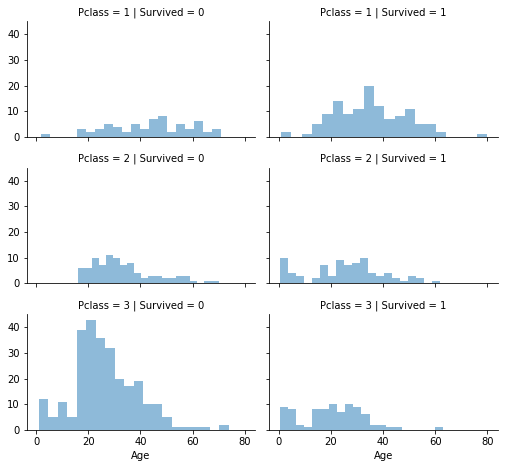

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- 범주형 feature의 상관관계

  - Observations
    - 여성 승객은 남성보다 훨씬 더 나은 생존율
    - Embarked=C 예외. 이는 Pcalss와 Embarked 사이의 상관관계가 될 수 있으며 Embarked와 Survived 사이에 반드시 직접적인 상관관게가 있는 것은 아님
    - 남성은 C 및 Q포트에 대해 Pclass=2와 비교할 때 Pclass=3에서 더 나은 생존율을 보였다
    - Embarked 는 Pclass=3및 남성 승객의 생존율이 다양함. (상관관계)
  
  - Decisions
    - 모델 훈련에 Sex 추가
    - 모델 훈련에 Embarked 추가



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


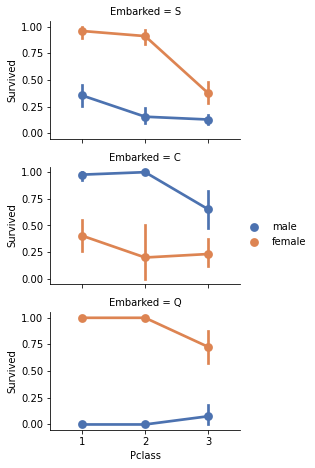

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

- 범주형 및 수치형 feature의 상관관계

  - Observations
    - 더 높은 Fare 를 지불하는 승객이 더 나은 생존율을 보임 (Fare 범위 생성에 대한 가정 확인)
    - Embarked는 생존율과 상관관계가 있음

  - Decisions
    - Fare 벤딩 고려

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


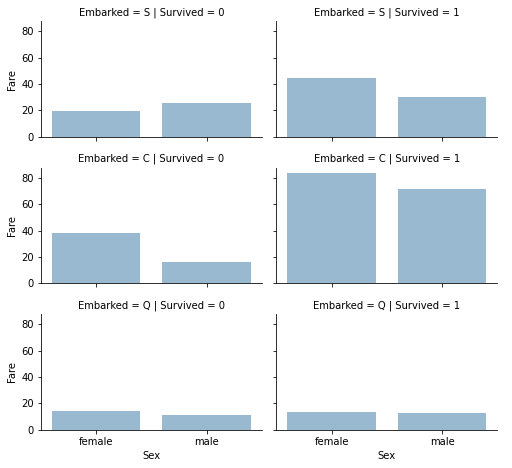

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## DATA Wrangling

- feature drop
  - 위에서의 가정과 결정에 따라 Cabin, Ticket 을 삭제하려한다.
  - 훈련 및 테스트셋에 모두 적용

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape



Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

- 기존에서 추출한 새로운 feature 생성
  - Name 및 PassengerId 를 삭제하기 전에 Title을 추출하고 Title과 Survived간의 상관관계를 테스트하도록 Name을 설계할 수 있는지 분석

  - 다음 코드는 정규식을 사용해 Title feature를 추출함
  - RegEx 패턴(\w+\.)은 Name 내에서 . 으로 끝나는 첫번째 단어와 일치. expand=False는 DataFrame을 반환

- Observations
  - Title, Age 및 Survived를 플롯할 때 다음에 주목
    - 대부분의 Title은 Age그룹을 정확하게 표시한다.
    - Title과 Age 그룹간의 생존은 약간 다름
    - 특정 Title은 대부분 살아남았고(Mme,Lady,Sir), (Don, Rev, Jonkheer)은 살아남지 못했음

- Decisions
  - 모델 훈련을 위해 새로운 Title feature을 사용



In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- 여러 Title을 더 일반적인 이름으로 바꾸거나 Rare로 분류할수있음

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


- 범주형 Title을 서수(Ordinal)로 변환

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


- Title feature를 생성했으니 Name, PassengerId  =>   **drop**

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

- Catorical feature 변환
  - 문자열을 포함하는 feature를 수치로 변환
  - 이는 대부분의 모델 알고리즘에서 필요함
  
  - Sex - female = 1, male = 0 으로 변환

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


- 연속적 numerical feature
  - null값 채우기
    1. 평균과 표준 편차 사이에 난수 생성
    2. 상관 특성을 사용
      - Age, Sex, Pclass 의 상관관계에 주목
      - Pclass, Gender 피처 조합 집합에서 Age의 중앙값을 사용하여 Age 값을 추측

    3. 1과2를 결합. 중앙값을 기준으로 Age값을 추측하는 대신 Pclass 및 Gender 조합 집합을 기반으로 평균과 표준편차 사이의 난수 사용
  
  - 1과 3은 우리의 모델에 무작위 노이즈를 도입함.(여러 실행결과가 다를 수 있음)
  - 방법 2 선호

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


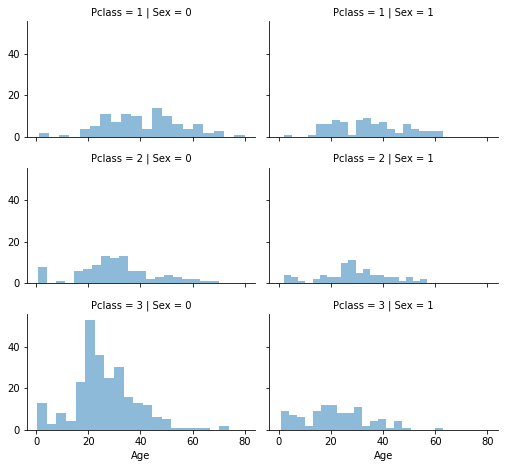

In [ ]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

- Pclass, Gender 조합을 기반을 추측된 Age 값을 포함하는 빈 배열 준비

In [ ]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

- 이제 Sex(0, 1), Pclass(1, 2, 3)을 반복하여 6개 조합에 대해 추측된 Age값을 계산

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            # guess _ages의 사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름

            age_guess = guess_df.median()

            # age의 random값의 소수점을 .5에 가깝도록 변형
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


- 'AgeBand'(연령대)를 만들고 Survived와의 상관관계 살펴봄
- Age를 범주형 변수로 바꿔주었음


In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


- AgeBand를 바탕으로 Age를 범주형 변수로 바꿔준 후, AgeBand변수는 제거

In [ ]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [ ]:
train_df.loc[train_df['Age'] == 3]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
6,0,1,0,3,3,0,1,1,3
11,1,1,1,3,2,0,2,1,3
15,1,2,1,3,2,0,3,1,6
52,1,1,1,3,3,1,3,0,3
94,0,3,0,3,0,0,1,1,9
...,...,...,...,...,...,...,...,...,...
796,1,1,1,3,2,0,5,1,3
820,1,1,1,3,3,0,3,0,3
829,1,1,1,3,3,0,3,1,3
857,1,1,0,3,2,0,1,1,3


In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


- Parch(부모,자녀수), SibSp(형제자매, 배우자 수)를 결합해 FamilySize 로 통합

- FamilySize = 1 은 함께 탑승한 가족이 없음을 의미

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


- 혼자 탑승했는지 여부를 의미하는 IsAlone 피처를 새로 만듬
  - 1은 동반X -> 혼자탑승
  - 0은 동반한 가족이 있음


- => 이후 Parch, SibSp, FamilySize 삭제

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [ ]:
print(train_df.info())
print('_'*40)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    float64

In [ ]:
# EDA 단계에서 Pclass와 결합시, Age의 생존 여부에 대한 설명력이 증가한 것에 근거하였다고 추측??

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


- Categorical feature 완성

  - Embarked에 2개의 결측값이 있음
    - 간단하게 빈도수로 채움
  
  -  => 수치로 변환

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

# train_df.Embarked.mode(dropna=False)[0] 와 다른점이 있나?

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


- Fare에 대해 mode()를 사용하여 단일 누락값 채움
- 하나의 값만 채우므로 상관관계 분석 등 다른 작업은 하지않음.

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [ ]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 모델 예측 및 해결

- 60개 이상의 예측 모델 알고리즘 중에서 선택해야한다.
- 선택할 모델을 좁히려면 문제 유형과 솔루션 요구 사항을 이해해야한다.
- 우리의 문제는 분류 및 회귀문제임.
- 출력(**Survived**), feature 간의 관계를 식별하려고한다.
- 지도학습.
- 지도학습과 분류 및 회귀라는 두가지 기준을 사용하여 모델 선택을 좁힘

  - Logistic Regression
  - KNN or k-Nearest Neighbors
  - Support Vector Machines
  - Naive Bayes classifier
  - Decision Tree
  - Random Forest
  - Perceptron
  - Artificial neural network
  - RVM or Relevance Vector Machine


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

- Logistic Regression
  - 워크플로 초기에 실행하는데 유용한 모델
  - 누적 로지스틱 분포인 로지스틱 함수를 사용하여 확률을 추정하여 범주형 종속 변수와 하나 이상의 독립변수 간의 관계를 측정

In [ ]:
#Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

- 생존 여부 예측에 영향력이 큰 변수는 성별(Sex)

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(log_reg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


- Support Vector Machines
  - 두 범주 중 하나 또는 다른 범주에 속하는 것으로 표시된 일련의 훈련 샘플이 주어지면 새 테스트 샘플을 한 범주 또는 다른 범주에 할당하는 모델을 구축하여 이를 비확률적 이진 선형 분류기로 만듬

In [ ]:
# SVM

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

- K-Nearest Neighbors (KNN)
  - 분류 및 회귀에서 사용되는 비모수적 방법
  - k개의 가장 가까운 이웃 중에서 가장 일반적인 클래스에 샘플이 할당되는 이웃의 과반수 투표로 분류됨
  - k = 1이면 객체는 단일 가장 가까운 이웃의 클래스에 단순하게 할당됨

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

- Gaussian Naive Bayes
  - feature 간에 강력한 독립 가정을 사용하여 베리즈 정리를 적용하는 것을 기반으로 하는 간단한 확률 분류기
  - 이 모델은 확장성이 높기 때문에 학습 문제의 feature 수에 선형적인 많은 매개변수가 필요함

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

- Perceptron
  - 이진 분류기의 지도학습을 위한 알고리즘
  - 선형 분류기의 한 유형
  - 가중치 집합을 특징 벡터와 결합하는 선형 예측 함수를 기반으로 에측을 수행하는 분류 알고리즘

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


79.12

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.99

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [ ]:
# Random Forest

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, Y_train)
Y_pred = rf_clf.predict(X_test)
acc_rf_clf = round(rf_clf.score(X_train, Y_train) * 100, 2)
acc_rf_clf

86.76

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_rf_clf, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,76.99
4,Naive Bayes,72.28


In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })